In [3]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# -*- coding: utf-8 -*-
import torch.nn as nn

class discriminator(nn.Module):
    def __init__(self):
        super(discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)


class generator(nn.Module):
    def __init__(self):
        super(generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(128, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

In [4]:
start_time = time.time()
plt.rcParams['image.cmap'] = 'gray'

def show_images(images):
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))

    for index, image in enumerate(images):
        plt.subplot(sqrtn, sqrtn, index+1)
        plt.imshow(image.reshape(28, 28))

In [5]:
# Discriminator Loss => BCELoss
def d_loss_function(inputs, targets):
    return nn.BCELoss()(inputs, targets)


def g_loss_function(inputs):
    targets = torch.ones([inputs.shape[0], 1])
    targets = targets.to(device)
    return nn.BCELoss()(inputs, targets)

In [6]:
# GPU
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('GPU State:', device)

# Model
G = generator().to(device)
D = discriminator().to(device)
print(G)
print(D)

# Settings
epochs = 200
lr = 0.0002
batch_size = 64
g_optimizer = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
d_optimizer = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))


# Transform
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])


# Load data
train_set = datasets.MNIST('mnist/', train=True, download=True, transform=transform)
test_set = datasets.MNIST('mnist/', train=False, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

GPU State: cuda:0
generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=784, bias=True)
    (5): Tanh()
  )
)
discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


100.1%

Extracting mnist/MNIST\raw\train-images-idx3-ubyte.gz to mnist/MNIST\raw


113.5%

Extracting mnist/MNIST\raw\train-labels-idx1-ubyte.gz to mnist/MNIST\raw


100.4%

Extracting mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to mnist/MNIST\raw


180.4%

Extracting mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to mnist/MNIST\raw
Processing...
Done!


[1/200, 100/938] D_loss: 0.721 G_loss: 0.822
[1/200, 200/938] D_loss: 0.713 G_loss: 0.753
[1/200, 300/938] D_loss: 0.680 G_loss: 0.890
[1/200, 400/938] D_loss: 0.692 G_loss: 0.761
[1/200, 500/938] D_loss: 0.488 G_loss: 1.141
[1/200, 600/938] D_loss: 0.829 G_loss: 1.033
[1/200, 700/938] D_loss: 0.527 G_loss: 1.252
[1/200, 800/938] D_loss: 0.487 G_loss: 2.620
[1/200, 900/938] D_loss: 0.349 G_loss: 1.336
[1/200, 938/938] D_loss: 0.342 G_loss: 2.216


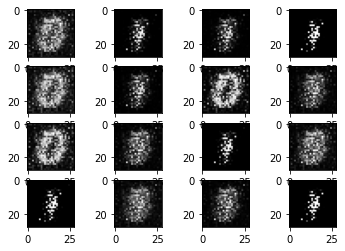

[2/200, 100/938] D_loss: 0.295 G_loss: 1.731
[2/200, 200/938] D_loss: 1.204 G_loss: 0.600
[2/200, 300/938] D_loss: 0.225 G_loss: 2.741
[2/200, 400/938] D_loss: 0.478 G_loss: 2.254
[2/200, 500/938] D_loss: 0.301 G_loss: 1.936
[2/200, 600/938] D_loss: 0.241 G_loss: 2.203
[2/200, 700/938] D_loss: 0.230 G_loss: 3.873
[2/200, 800/938] D_loss: 0.562 G_loss: 4.608
[2/200, 900/938] D_loss: 0.662 G_loss: 0.863
[2/200, 938/938] D_loss: 0.337 G_loss: 1.795


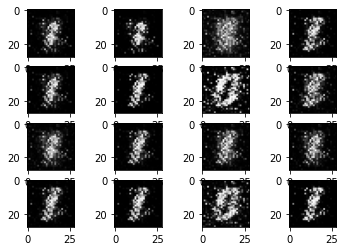

[3/200, 100/938] D_loss: 0.357 G_loss: 1.557
[3/200, 200/938] D_loss: 0.307 G_loss: 1.556
[3/200, 300/938] D_loss: 0.226 G_loss: 2.691
[3/200, 400/938] D_loss: 0.348 G_loss: 2.033
[3/200, 500/938] D_loss: 0.356 G_loss: 1.945
[3/200, 600/938] D_loss: 0.354 G_loss: 1.765
[3/200, 700/938] D_loss: 0.588 G_loss: 0.833
[3/200, 800/938] D_loss: 0.454 G_loss: 1.212
[3/200, 900/938] D_loss: 0.374 G_loss: 1.847
[3/200, 938/938] D_loss: 0.238 G_loss: 2.351


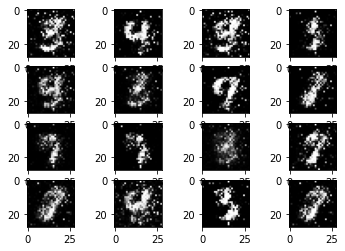

[4/200, 100/938] D_loss: 0.479 G_loss: 1.087
[4/200, 200/938] D_loss: 0.542 G_loss: 1.237
[4/200, 300/938] D_loss: 0.348 G_loss: 1.487
[4/200, 400/938] D_loss: 0.453 G_loss: 2.529
[4/200, 500/938] D_loss: 0.491 G_loss: 1.122
[4/200, 600/938] D_loss: 0.411 G_loss: 1.825
[4/200, 700/938] D_loss: 0.460 G_loss: 2.253
[4/200, 800/938] D_loss: 0.367 G_loss: 1.983
[4/200, 900/938] D_loss: 0.392 G_loss: 2.456
[4/200, 938/938] D_loss: 0.384 G_loss: 1.636


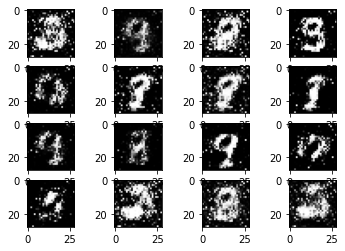

[5/200, 100/938] D_loss: 0.406 G_loss: 2.236
[5/200, 200/938] D_loss: 0.481 G_loss: 0.841
[5/200, 300/938] D_loss: 0.357 G_loss: 2.459
[5/200, 400/938] D_loss: 0.621 G_loss: 0.954
[5/200, 500/938] D_loss: 0.645 G_loss: 1.053
[5/200, 600/938] D_loss: 0.466 G_loss: 2.097
[5/200, 700/938] D_loss: 0.418 G_loss: 2.885
[5/200, 800/938] D_loss: 0.467 G_loss: 1.226
[5/200, 900/938] D_loss: 0.450 G_loss: 1.519
[5/200, 938/938] D_loss: 0.515 G_loss: 2.400


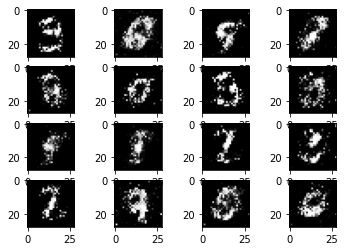

[6/200, 100/938] D_loss: 0.436 G_loss: 1.168
[6/200, 200/938] D_loss: 0.382 G_loss: 1.888
[6/200, 300/938] D_loss: 0.391 G_loss: 2.084
[6/200, 400/938] D_loss: 0.422 G_loss: 1.465
[6/200, 500/938] D_loss: 0.455 G_loss: 1.282
[6/200, 600/938] D_loss: 0.509 G_loss: 1.275
[6/200, 700/938] D_loss: 0.518 G_loss: 1.600
[6/200, 800/938] D_loss: 0.350 G_loss: 1.632
[6/200, 900/938] D_loss: 0.511 G_loss: 0.909
[6/200, 938/938] D_loss: 0.432 G_loss: 1.110


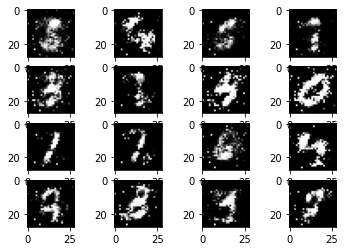

[7/200, 100/938] D_loss: 0.498 G_loss: 2.824
[7/200, 200/938] D_loss: 0.371 G_loss: 1.097
[7/200, 300/938] D_loss: 0.390 G_loss: 1.994
[7/200, 400/938] D_loss: 0.566 G_loss: 1.493
[7/200, 500/938] D_loss: 0.406 G_loss: 1.877
[7/200, 600/938] D_loss: 0.459 G_loss: 1.014
[7/200, 700/938] D_loss: 0.494 G_loss: 1.475
[7/200, 800/938] D_loss: 0.412 G_loss: 1.450
[7/200, 900/938] D_loss: 0.513 G_loss: 1.090
[7/200, 938/938] D_loss: 0.459 G_loss: 1.380


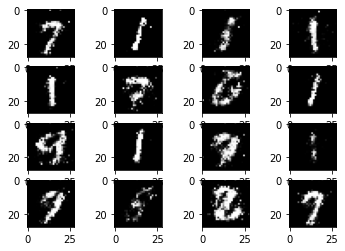

[8/200, 100/938] D_loss: 0.507 G_loss: 1.307
[8/200, 200/938] D_loss: 0.505 G_loss: 2.375
[8/200, 300/938] D_loss: 0.471 G_loss: 1.035
[8/200, 400/938] D_loss: 0.531 G_loss: 1.733
[8/200, 500/938] D_loss: 0.525 G_loss: 0.892
[8/200, 600/938] D_loss: 0.417 G_loss: 1.229
[8/200, 700/938] D_loss: 0.552 G_loss: 1.193
[8/200, 800/938] D_loss: 0.590 G_loss: 2.218
[8/200, 900/938] D_loss: 0.455 G_loss: 0.865
[8/200, 938/938] D_loss: 0.602 G_loss: 2.258


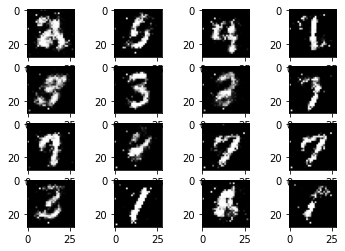

[9/200, 100/938] D_loss: 0.489 G_loss: 1.395
[9/200, 200/938] D_loss: 0.528 G_loss: 1.091
[9/200, 300/938] D_loss: 0.619 G_loss: 0.688
[9/200, 400/938] D_loss: 0.537 G_loss: 1.208
[9/200, 500/938] D_loss: 0.539 G_loss: 1.340
[9/200, 600/938] D_loss: 0.636 G_loss: 1.309
[9/200, 700/938] D_loss: 0.583 G_loss: 1.245
[9/200, 800/938] D_loss: 0.493 G_loss: 1.274
[9/200, 900/938] D_loss: 0.598 G_loss: 0.927
[9/200, 938/938] D_loss: 0.543 G_loss: 0.868


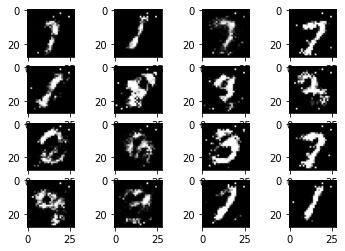

[10/200, 100/938] D_loss: 0.597 G_loss: 1.149
[10/200, 200/938] D_loss: 0.573 G_loss: 1.416
[10/200, 300/938] D_loss: 0.529 G_loss: 1.430
[10/200, 400/938] D_loss: 0.577 G_loss: 0.961
[10/200, 500/938] D_loss: 0.526 G_loss: 0.843
[10/200, 600/938] D_loss: 0.620 G_loss: 0.774
[10/200, 700/938] D_loss: 0.550 G_loss: 1.192
[10/200, 800/938] D_loss: 0.594 G_loss: 0.692
[10/200, 900/938] D_loss: 0.603 G_loss: 1.382
[10/200, 938/938] D_loss: 0.497 G_loss: 1.665


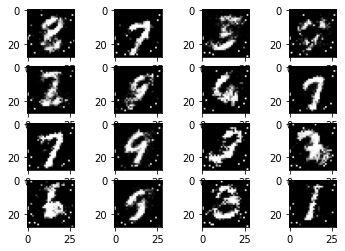

[11/200, 100/938] D_loss: 0.606 G_loss: 0.998
[11/200, 200/938] D_loss: 0.556 G_loss: 1.511
[11/200, 300/938] D_loss: 0.539 G_loss: 1.005
[11/200, 400/938] D_loss: 0.604 G_loss: 0.683
[11/200, 500/938] D_loss: 0.535 G_loss: 1.189
[11/200, 600/938] D_loss: 0.539 G_loss: 1.784
[11/200, 700/938] D_loss: 0.530 G_loss: 1.453
[11/200, 800/938] D_loss: 0.687 G_loss: 0.750
[11/200, 900/938] D_loss: 0.645 G_loss: 1.122
[11/200, 938/938] D_loss: 0.475 G_loss: 1.143


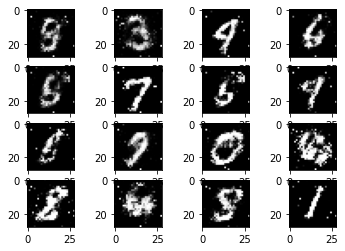

[12/200, 100/938] D_loss: 0.661 G_loss: 1.388
[12/200, 200/938] D_loss: 0.626 G_loss: 1.091
[12/200, 300/938] D_loss: 0.622 G_loss: 0.741
[12/200, 400/938] D_loss: 0.522 G_loss: 1.174
[12/200, 500/938] D_loss: 0.531 G_loss: 0.796
[12/200, 600/938] D_loss: 0.557 G_loss: 1.014
[12/200, 700/938] D_loss: 0.603 G_loss: 0.931
[12/200, 800/938] D_loss: 0.570 G_loss: 1.284
[12/200, 900/938] D_loss: 0.558 G_loss: 2.212
[12/200, 938/938] D_loss: 0.618 G_loss: 0.673


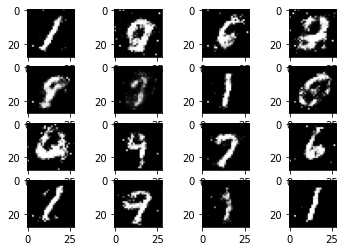

[13/200, 100/938] D_loss: 0.550 G_loss: 0.811
[13/200, 200/938] D_loss: 0.660 G_loss: 0.749
[13/200, 300/938] D_loss: 0.631 G_loss: 1.223
[13/200, 400/938] D_loss: 0.580 G_loss: 1.195
[13/200, 500/938] D_loss: 0.628 G_loss: 0.680
[13/200, 600/938] D_loss: 0.683 G_loss: 0.712
[13/200, 700/938] D_loss: 0.670 G_loss: 1.066
[13/200, 800/938] D_loss: 0.611 G_loss: 0.655
[13/200, 900/938] D_loss: 0.606 G_loss: 1.138
[13/200, 938/938] D_loss: 0.594 G_loss: 0.901


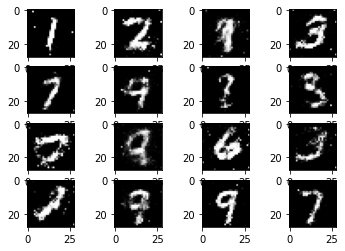

[14/200, 100/938] D_loss: 0.531 G_loss: 1.261
[14/200, 200/938] D_loss: 0.616 G_loss: 0.895
[14/200, 300/938] D_loss: 0.632 G_loss: 1.034
[14/200, 400/938] D_loss: 0.628 G_loss: 1.185
[14/200, 500/938] D_loss: 0.603 G_loss: 1.117
[14/200, 600/938] D_loss: 0.606 G_loss: 1.031
[14/200, 700/938] D_loss: 0.614 G_loss: 1.170
[14/200, 800/938] D_loss: 0.595 G_loss: 1.029
[14/200, 900/938] D_loss: 0.587 G_loss: 0.743
[14/200, 938/938] D_loss: 0.612 G_loss: 0.924


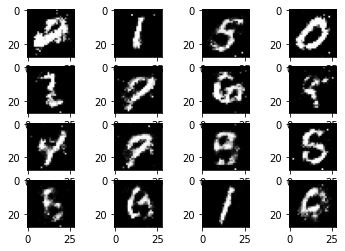

[15/200, 100/938] D_loss: 0.611 G_loss: 1.082
[15/200, 200/938] D_loss: 0.612 G_loss: 1.278
[15/200, 300/938] D_loss: 0.618 G_loss: 1.134
[15/200, 400/938] D_loss: 0.661 G_loss: 0.738
[15/200, 500/938] D_loss: 0.663 G_loss: 1.349
[15/200, 600/938] D_loss: 0.619 G_loss: 0.896
[15/200, 700/938] D_loss: 0.614 G_loss: 0.873
[15/200, 800/938] D_loss: 0.615 G_loss: 0.939
[15/200, 900/938] D_loss: 0.676 G_loss: 0.708
[15/200, 938/938] D_loss: 0.623 G_loss: 0.766


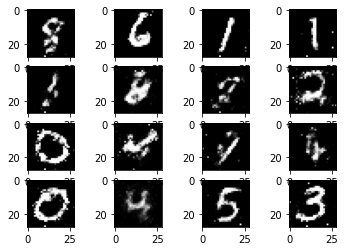

[16/200, 100/938] D_loss: 0.620 G_loss: 0.853
[16/200, 200/938] D_loss: 0.612 G_loss: 1.087
[16/200, 300/938] D_loss: 0.651 G_loss: 0.748
[16/200, 400/938] D_loss: 0.558 G_loss: 1.040
[16/200, 500/938] D_loss: 0.648 G_loss: 0.791
[16/200, 600/938] D_loss: 0.649 G_loss: 1.168
[16/200, 700/938] D_loss: 0.604 G_loss: 1.057
[16/200, 800/938] D_loss: 0.615 G_loss: 0.913
[16/200, 900/938] D_loss: 0.668 G_loss: 0.674
[16/200, 938/938] D_loss: 0.624 G_loss: 0.739


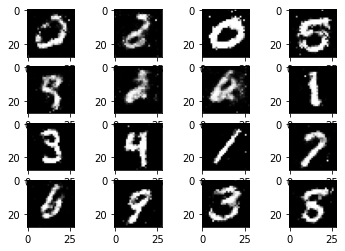

[17/200, 100/938] D_loss: 0.583 G_loss: 0.784
[17/200, 200/938] D_loss: 0.642 G_loss: 1.004
[17/200, 300/938] D_loss: 0.631 G_loss: 0.801
[17/200, 400/938] D_loss: 0.651 G_loss: 1.013
[17/200, 500/938] D_loss: 0.622 G_loss: 0.988
[17/200, 600/938] D_loss: 0.637 G_loss: 0.859
[17/200, 700/938] D_loss: 0.618 G_loss: 0.678
[17/200, 800/938] D_loss: 0.576 G_loss: 0.818
[17/200, 900/938] D_loss: 0.621 G_loss: 0.925
[17/200, 938/938] D_loss: 0.720 G_loss: 0.942


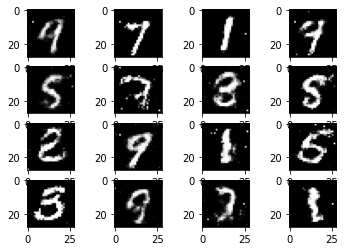

[18/200, 100/938] D_loss: 0.588 G_loss: 0.953
[18/200, 200/938] D_loss: 0.655 G_loss: 0.640
[18/200, 300/938] D_loss: 0.661 G_loss: 1.245
[18/200, 400/938] D_loss: 0.622 G_loss: 1.047
[18/200, 500/938] D_loss: 0.608 G_loss: 0.742
[18/200, 600/938] D_loss: 0.636 G_loss: 1.029
[18/200, 700/938] D_loss: 0.620 G_loss: 0.906
[18/200, 800/938] D_loss: 0.596 G_loss: 0.861
[18/200, 900/938] D_loss: 0.626 G_loss: 1.159
[18/200, 938/938] D_loss: 0.649 G_loss: 0.612


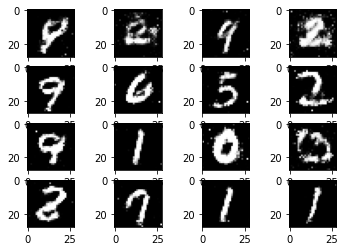

[19/200, 100/938] D_loss: 0.673 G_loss: 0.960
[19/200, 200/938] D_loss: 0.620 G_loss: 0.740
[19/200, 300/938] D_loss: 0.607 G_loss: 0.931
[19/200, 400/938] D_loss: 0.648 G_loss: 1.045
[19/200, 500/938] D_loss: 0.630 G_loss: 0.967
[19/200, 600/938] D_loss: 0.733 G_loss: 0.753
[19/200, 700/938] D_loss: 0.636 G_loss: 0.741
[19/200, 800/938] D_loss: 0.658 G_loss: 0.760
[19/200, 900/938] D_loss: 0.647 G_loss: 0.749
[19/200, 938/938] D_loss: 0.659 G_loss: 0.990


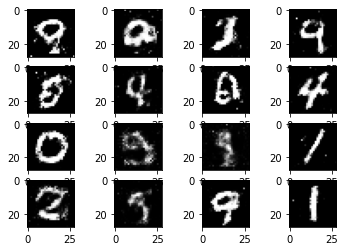

[20/200, 100/938] D_loss: 0.593 G_loss: 0.638
[20/200, 200/938] D_loss: 0.564 G_loss: 0.973
[20/200, 300/938] D_loss: 0.640 G_loss: 0.933
[20/200, 400/938] D_loss: 0.643 G_loss: 1.164
[20/200, 500/938] D_loss: 0.633 G_loss: 0.924
[20/200, 600/938] D_loss: 0.674 G_loss: 0.941
[20/200, 700/938] D_loss: 0.628 G_loss: 0.729
[20/200, 800/938] D_loss: 0.571 G_loss: 0.892
[20/200, 900/938] D_loss: 0.603 G_loss: 0.886
[20/200, 938/938] D_loss: 0.680 G_loss: 0.496


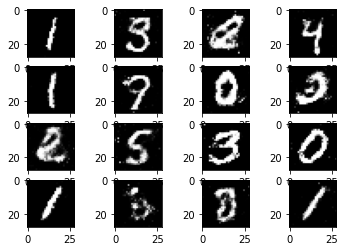

[21/200, 100/938] D_loss: 0.633 G_loss: 0.861
[21/200, 200/938] D_loss: 0.593 G_loss: 0.901
[21/200, 300/938] D_loss: 0.668 G_loss: 1.018
[21/200, 400/938] D_loss: 0.618 G_loss: 0.772
[21/200, 500/938] D_loss: 0.648 G_loss: 0.909
[21/200, 600/938] D_loss: 0.640 G_loss: 1.040
[21/200, 700/938] D_loss: 0.627 G_loss: 1.013
[21/200, 800/938] D_loss: 0.620 G_loss: 0.680
[21/200, 900/938] D_loss: 0.626 G_loss: 1.057
[21/200, 938/938] D_loss: 0.614 G_loss: 1.251


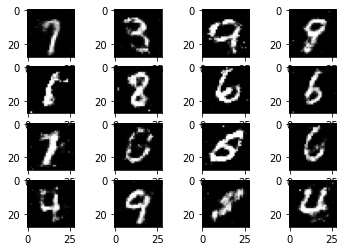

[22/200, 100/938] D_loss: 0.607 G_loss: 1.039
[22/200, 200/938] D_loss: 0.638 G_loss: 0.589
[22/200, 300/938] D_loss: 0.685 G_loss: 0.764
[22/200, 400/938] D_loss: 0.621 G_loss: 1.135
[22/200, 500/938] D_loss: 0.619 G_loss: 0.864
[22/200, 600/938] D_loss: 0.670 G_loss: 0.857
[22/200, 700/938] D_loss: 0.640 G_loss: 1.113
[22/200, 800/938] D_loss: 0.645 G_loss: 0.948
[22/200, 900/938] D_loss: 0.598 G_loss: 1.155
[22/200, 938/938] D_loss: 0.633 G_loss: 0.840


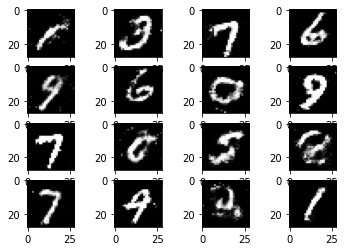

[23/200, 100/938] D_loss: 0.670 G_loss: 1.152
[23/200, 200/938] D_loss: 0.615 G_loss: 0.803
[23/200, 300/938] D_loss: 0.640 G_loss: 0.722
[23/200, 400/938] D_loss: 0.636 G_loss: 1.012
[23/200, 500/938] D_loss: 0.611 G_loss: 0.758
[23/200, 600/938] D_loss: 0.630 G_loss: 0.731
[23/200, 700/938] D_loss: 0.618 G_loss: 0.874
[23/200, 800/938] D_loss: 0.601 G_loss: 0.965
[23/200, 900/938] D_loss: 0.632 G_loss: 0.900
[23/200, 938/938] D_loss: 0.617 G_loss: 0.832


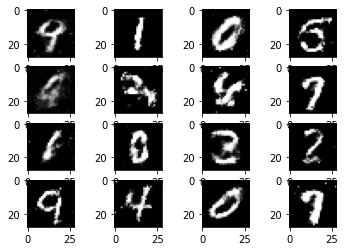

[24/200, 100/938] D_loss: 0.603 G_loss: 0.813
[24/200, 200/938] D_loss: 0.601 G_loss: 0.909
[24/200, 300/938] D_loss: 0.605 G_loss: 0.881
[24/200, 400/938] D_loss: 0.586 G_loss: 0.736
[24/200, 500/938] D_loss: 0.640 G_loss: 0.840
[24/200, 600/938] D_loss: 0.609 G_loss: 0.827
[24/200, 700/938] D_loss: 0.653 G_loss: 0.760
[24/200, 800/938] D_loss: 0.591 G_loss: 0.890
[24/200, 900/938] D_loss: 0.606 G_loss: 0.883
[24/200, 938/938] D_loss: 0.605 G_loss: 0.913


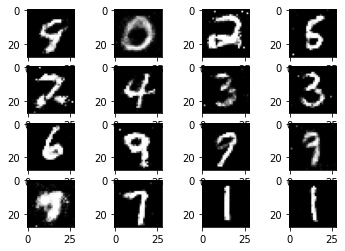

[25/200, 100/938] D_loss: 0.638 G_loss: 0.834
[25/200, 200/938] D_loss: 0.573 G_loss: 0.871
[25/200, 300/938] D_loss: 0.623 G_loss: 1.029
[25/200, 400/938] D_loss: 0.619 G_loss: 0.793
[25/200, 500/938] D_loss: 0.659 G_loss: 0.893
[25/200, 600/938] D_loss: 0.642 G_loss: 1.252
[25/200, 700/938] D_loss: 0.584 G_loss: 0.912
[25/200, 800/938] D_loss: 0.630 G_loss: 0.727
[25/200, 900/938] D_loss: 0.686 G_loss: 1.248
[25/200, 938/938] D_loss: 0.637 G_loss: 0.924


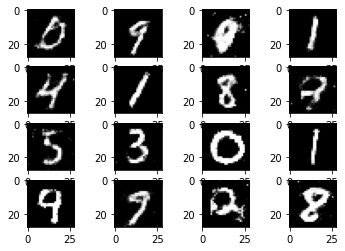

[26/200, 100/938] D_loss: 0.621 G_loss: 0.913
[26/200, 200/938] D_loss: 0.660 G_loss: 1.262
[26/200, 300/938] D_loss: 0.635 G_loss: 0.856
[26/200, 400/938] D_loss: 0.659 G_loss: 0.972
[26/200, 500/938] D_loss: 0.636 G_loss: 0.684
[26/200, 600/938] D_loss: 0.638 G_loss: 0.666
[26/200, 700/938] D_loss: 0.595 G_loss: 0.837
[26/200, 800/938] D_loss: 0.630 G_loss: 0.826
[26/200, 900/938] D_loss: 0.648 G_loss: 1.107
[26/200, 938/938] D_loss: 0.640 G_loss: 1.072


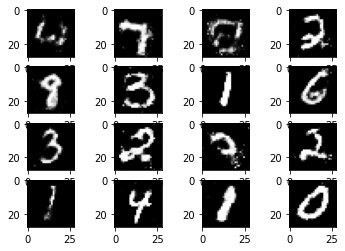

[27/200, 100/938] D_loss: 0.686 G_loss: 0.545
[27/200, 200/938] D_loss: 0.581 G_loss: 0.905
[27/200, 300/938] D_loss: 0.648 G_loss: 1.163
[27/200, 400/938] D_loss: 0.608 G_loss: 0.940
[27/200, 500/938] D_loss: 0.570 G_loss: 0.974
[27/200, 600/938] D_loss: 0.562 G_loss: 0.833
[27/200, 700/938] D_loss: 0.663 G_loss: 0.851
[27/200, 800/938] D_loss: 0.619 G_loss: 0.980
[27/200, 900/938] D_loss: 0.654 G_loss: 0.609
[27/200, 938/938] D_loss: 0.678 G_loss: 0.794


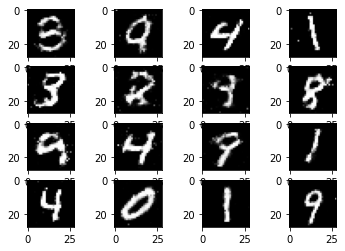

[28/200, 100/938] D_loss: 0.642 G_loss: 0.944
[28/200, 200/938] D_loss: 0.643 G_loss: 0.831
[28/200, 300/938] D_loss: 0.690 G_loss: 0.617
[28/200, 400/938] D_loss: 0.600 G_loss: 1.129
[28/200, 500/938] D_loss: 0.678 G_loss: 0.712
[28/200, 600/938] D_loss: 0.599 G_loss: 0.848
[28/200, 700/938] D_loss: 0.614 G_loss: 0.706
[28/200, 800/938] D_loss: 0.626 G_loss: 0.873
[28/200, 900/938] D_loss: 0.645 G_loss: 1.056
[28/200, 938/938] D_loss: 0.628 G_loss: 0.934


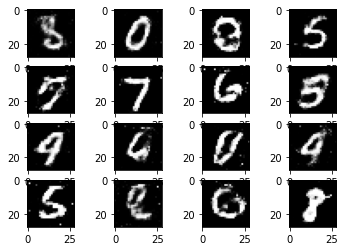

[29/200, 100/938] D_loss: 0.609 G_loss: 0.618
[29/200, 200/938] D_loss: 0.589 G_loss: 0.746
[29/200, 300/938] D_loss: 0.647 G_loss: 0.727
[29/200, 400/938] D_loss: 0.616 G_loss: 1.095
[29/200, 500/938] D_loss: 0.566 G_loss: 0.964
[29/200, 600/938] D_loss: 0.640 G_loss: 1.146
[29/200, 700/938] D_loss: 0.572 G_loss: 0.759
[29/200, 800/938] D_loss: 0.713 G_loss: 0.848
[29/200, 900/938] D_loss: 0.643 G_loss: 0.748
[29/200, 938/938] D_loss: 0.658 G_loss: 1.080


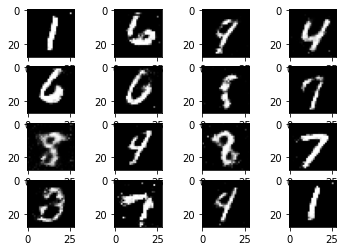

[30/200, 100/938] D_loss: 0.607 G_loss: 1.082
[30/200, 200/938] D_loss: 0.586 G_loss: 0.712
[30/200, 300/938] D_loss: 0.645 G_loss: 1.101
[30/200, 400/938] D_loss: 0.643 G_loss: 0.937
[30/200, 500/938] D_loss: 0.634 G_loss: 0.991
[30/200, 600/938] D_loss: 0.656 G_loss: 0.630
[30/200, 700/938] D_loss: 0.579 G_loss: 0.834
[30/200, 800/938] D_loss: 0.645 G_loss: 0.953
[30/200, 900/938] D_loss: 0.647 G_loss: 1.251
[30/200, 938/938] D_loss: 0.626 G_loss: 0.885


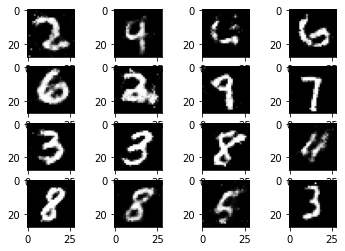

[31/200, 100/938] D_loss: 0.655 G_loss: 1.262
[31/200, 200/938] D_loss: 0.612 G_loss: 0.856
[31/200, 300/938] D_loss: 0.635 G_loss: 1.045
[31/200, 400/938] D_loss: 0.630 G_loss: 0.839
[31/200, 500/938] D_loss: 0.640 G_loss: 0.857
[31/200, 600/938] D_loss: 0.620 G_loss: 1.006
[31/200, 700/938] D_loss: 0.605 G_loss: 0.725
[31/200, 800/938] D_loss: 0.602 G_loss: 0.754
[31/200, 900/938] D_loss: 0.611 G_loss: 1.020
[31/200, 938/938] D_loss: 0.588 G_loss: 0.867


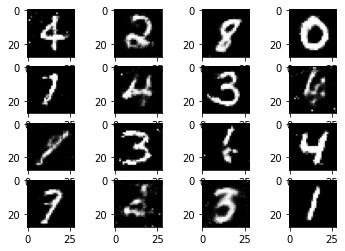

[32/200, 100/938] D_loss: 0.668 G_loss: 1.128
[32/200, 200/938] D_loss: 0.600 G_loss: 0.908
[32/200, 300/938] D_loss: 0.735 G_loss: 0.495
[32/200, 400/938] D_loss: 0.601 G_loss: 0.889
[32/200, 500/938] D_loss: 0.602 G_loss: 0.664
[32/200, 600/938] D_loss: 0.593 G_loss: 0.848
[32/200, 700/938] D_loss: 0.644 G_loss: 0.662
[32/200, 800/938] D_loss: 0.576 G_loss: 1.015
[32/200, 900/938] D_loss: 0.591 G_loss: 0.929
[32/200, 938/938] D_loss: 0.614 G_loss: 1.214


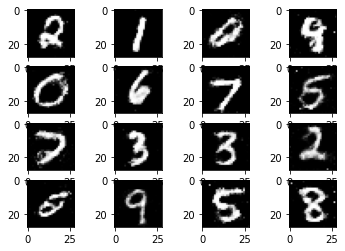

[33/200, 100/938] D_loss: 0.628 G_loss: 0.633
[33/200, 200/938] D_loss: 0.649 G_loss: 1.035
[33/200, 300/938] D_loss: 0.651 G_loss: 0.931
[33/200, 400/938] D_loss: 0.617 G_loss: 0.706
[33/200, 500/938] D_loss: 0.626 G_loss: 1.022
[33/200, 600/938] D_loss: 0.611 G_loss: 0.915
[33/200, 700/938] D_loss: 0.620 G_loss: 0.841
[33/200, 800/938] D_loss: 0.631 G_loss: 0.694
[33/200, 900/938] D_loss: 0.586 G_loss: 0.863
[33/200, 938/938] D_loss: 0.640 G_loss: 1.120


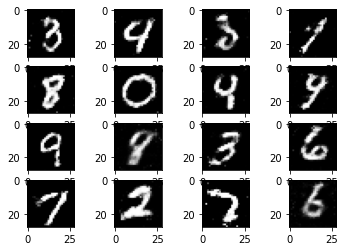

[34/200, 100/938] D_loss: 0.589 G_loss: 0.905
[34/200, 200/938] D_loss: 0.661 G_loss: 0.585
[34/200, 300/938] D_loss: 0.596 G_loss: 0.869
[34/200, 400/938] D_loss: 0.645 G_loss: 0.863
[34/200, 500/938] D_loss: 0.641 G_loss: 0.677
[34/200, 600/938] D_loss: 0.613 G_loss: 0.928
[34/200, 700/938] D_loss: 0.646 G_loss: 0.795
[34/200, 800/938] D_loss: 0.641 G_loss: 0.797
[34/200, 900/938] D_loss: 0.675 G_loss: 0.667
[34/200, 938/938] D_loss: 0.572 G_loss: 1.326


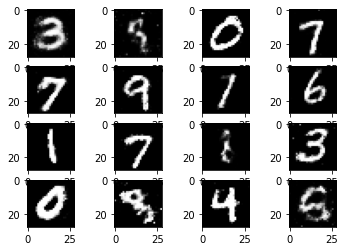

[35/200, 100/938] D_loss: 0.595 G_loss: 0.832
[35/200, 200/938] D_loss: 0.669 G_loss: 0.758
[35/200, 300/938] D_loss: 0.581 G_loss: 1.175
[35/200, 400/938] D_loss: 0.643 G_loss: 1.078
[35/200, 500/938] D_loss: 0.621 G_loss: 0.829
[35/200, 600/938] D_loss: 0.651 G_loss: 0.727
[35/200, 700/938] D_loss: 0.631 G_loss: 0.854
[35/200, 800/938] D_loss: 0.621 G_loss: 0.770
[35/200, 900/938] D_loss: 0.586 G_loss: 0.861
[35/200, 938/938] D_loss: 0.652 G_loss: 0.637


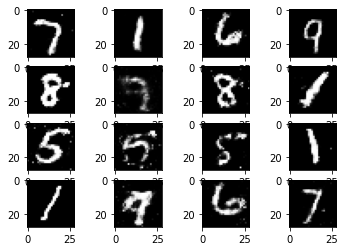

[36/200, 100/938] D_loss: 0.612 G_loss: 0.738
[36/200, 200/938] D_loss: 0.641 G_loss: 0.777
[36/200, 300/938] D_loss: 0.627 G_loss: 0.864
[36/200, 400/938] D_loss: 0.615 G_loss: 1.222
[36/200, 500/938] D_loss: 0.624 G_loss: 1.242
[36/200, 600/938] D_loss: 0.633 G_loss: 0.967
[36/200, 700/938] D_loss: 0.619 G_loss: 0.901
[36/200, 800/938] D_loss: 0.641 G_loss: 0.889
[36/200, 900/938] D_loss: 0.634 G_loss: 1.088
[36/200, 938/938] D_loss: 0.664 G_loss: 0.821


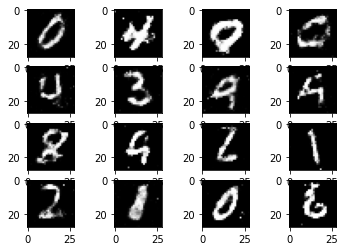

[37/200, 100/938] D_loss: 0.672 G_loss: 1.056
[37/200, 200/938] D_loss: 0.605 G_loss: 0.847
[37/200, 300/938] D_loss: 0.643 G_loss: 0.748
[37/200, 400/938] D_loss: 0.627 G_loss: 0.738
[37/200, 500/938] D_loss: 0.598 G_loss: 0.819
[37/200, 600/938] D_loss: 0.639 G_loss: 1.158
[37/200, 700/938] D_loss: 0.581 G_loss: 0.950
[37/200, 800/938] D_loss: 0.646 G_loss: 1.220
[37/200, 900/938] D_loss: 0.614 G_loss: 0.765
[37/200, 938/938] D_loss: 0.589 G_loss: 0.785


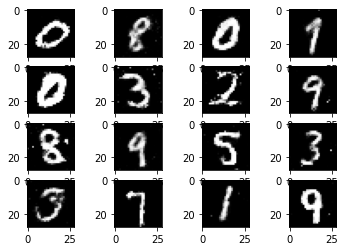

[38/200, 100/938] D_loss: 0.628 G_loss: 0.865
[38/200, 200/938] D_loss: 0.684 G_loss: 1.096
[38/200, 300/938] D_loss: 0.641 G_loss: 0.921
[38/200, 400/938] D_loss: 0.612 G_loss: 1.135
[38/200, 500/938] D_loss: 0.620 G_loss: 0.828
[38/200, 600/938] D_loss: 0.621 G_loss: 0.998
[38/200, 700/938] D_loss: 0.647 G_loss: 1.092
[38/200, 800/938] D_loss: 0.671 G_loss: 1.258
[38/200, 900/938] D_loss: 0.654 G_loss: 1.102
[38/200, 938/938] D_loss: 0.652 G_loss: 0.827


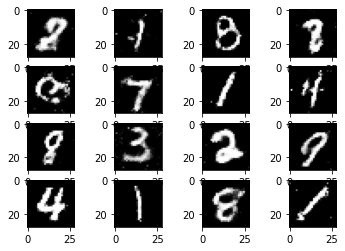

[39/200, 100/938] D_loss: 0.613 G_loss: 0.734
[39/200, 200/938] D_loss: 0.639 G_loss: 0.858
[39/200, 300/938] D_loss: 0.621 G_loss: 0.683
[39/200, 400/938] D_loss: 0.670 G_loss: 0.942
[39/200, 500/938] D_loss: 0.607 G_loss: 0.950
[39/200, 600/938] D_loss: 0.646 G_loss: 1.027
[39/200, 700/938] D_loss: 0.622 G_loss: 0.795
[39/200, 800/938] D_loss: 0.595 G_loss: 0.866
[39/200, 900/938] D_loss: 0.664 G_loss: 0.980
[39/200, 938/938] D_loss: 0.737 G_loss: 1.243


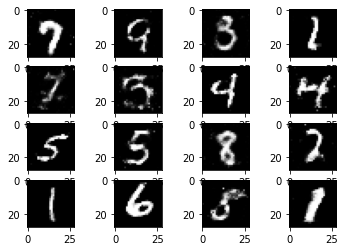

[40/200, 100/938] D_loss: 0.621 G_loss: 0.820
[40/200, 200/938] D_loss: 0.645 G_loss: 0.954
[40/200, 300/938] D_loss: 0.670 G_loss: 1.164
[40/200, 400/938] D_loss: 0.617 G_loss: 1.011
[40/200, 500/938] D_loss: 0.648 G_loss: 0.794
[40/200, 600/938] D_loss: 0.619 G_loss: 0.913
[40/200, 700/938] D_loss: 0.610 G_loss: 1.040
[40/200, 800/938] D_loss: 0.570 G_loss: 0.887
[40/200, 900/938] D_loss: 0.620 G_loss: 0.772
[40/200, 938/938] D_loss: 0.583 G_loss: 1.171


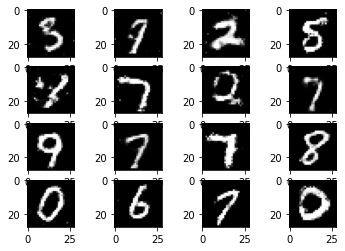

[41/200, 100/938] D_loss: 0.655 G_loss: 0.707
[41/200, 200/938] D_loss: 0.626 G_loss: 0.803
[41/200, 300/938] D_loss: 0.621 G_loss: 1.223
[41/200, 400/938] D_loss: 0.582 G_loss: 0.974
[41/200, 500/938] D_loss: 0.576 G_loss: 1.045
[41/200, 600/938] D_loss: 0.645 G_loss: 1.003
[41/200, 700/938] D_loss: 0.596 G_loss: 0.907
[41/200, 800/938] D_loss: 0.566 G_loss: 0.857
[41/200, 900/938] D_loss: 0.581 G_loss: 1.020
[41/200, 938/938] D_loss: 0.670 G_loss: 0.775


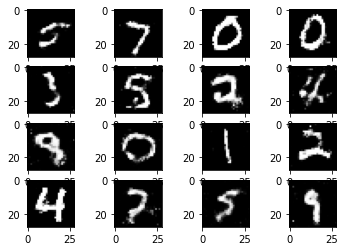

[42/200, 100/938] D_loss: 0.609 G_loss: 0.680
[42/200, 200/938] D_loss: 0.597 G_loss: 0.846
[42/200, 300/938] D_loss: 0.613 G_loss: 1.138
[42/200, 400/938] D_loss: 0.629 G_loss: 0.923
[42/200, 500/938] D_loss: 0.620 G_loss: 0.916
[42/200, 600/938] D_loss: 0.613 G_loss: 0.917
[42/200, 700/938] D_loss: 0.614 G_loss: 0.791
[42/200, 800/938] D_loss: 0.615 G_loss: 1.025
[42/200, 900/938] D_loss: 0.610 G_loss: 0.781
[42/200, 938/938] D_loss: 0.567 G_loss: 0.998


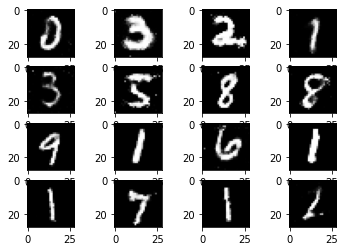

[43/200, 100/938] D_loss: 0.579 G_loss: 1.004
[43/200, 200/938] D_loss: 0.648 G_loss: 0.795
[43/200, 300/938] D_loss: 0.595 G_loss: 0.691
[43/200, 400/938] D_loss: 0.584 G_loss: 0.959
[43/200, 500/938] D_loss: 0.657 G_loss: 0.696
[43/200, 600/938] D_loss: 0.574 G_loss: 1.098
[43/200, 700/938] D_loss: 0.635 G_loss: 1.160
[43/200, 800/938] D_loss: 0.584 G_loss: 0.895
[43/200, 900/938] D_loss: 0.603 G_loss: 0.786
[43/200, 938/938] D_loss: 0.690 G_loss: 1.006


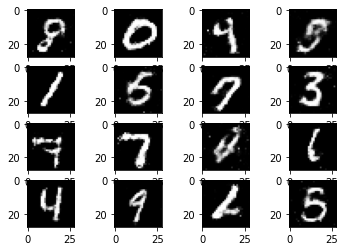

[44/200, 100/938] D_loss: 0.629 G_loss: 0.769


KeyboardInterrupt: 

In [7]:
# Train
for epoch in range(epochs):
    epoch += 1

    for times, data in enumerate(train_loader):
        times += 1
        real_inputs = data[0].to(device)
        test = 255 * (0.5 * real_inputs[0] + 0.5)

        real_inputs = real_inputs.view(-1, 784)
        real_outputs = D(real_inputs)
        real_label = torch.ones(real_inputs.shape[0], 1).to(device)

        noise = (torch.rand(real_inputs.shape[0], 128) - 0.5) / 0.5
        noise = noise.to(device)
        fake_inputs = G(noise)
        fake_outputs = D(fake_inputs)
        fake_label = torch.zeros(fake_inputs.shape[0], 1).to(device)

        outputs = torch.cat((real_outputs, fake_outputs), 0)
        targets = torch.cat((real_label, fake_label), 0)

        # Zero the parameter gradients
        d_optimizer.zero_grad()

        # Backward propagation
        d_loss = d_loss_function(outputs, targets)
        d_loss.backward()
        d_optimizer.step()

        # Generator
        noise = (torch.rand(real_inputs.shape[0], 128)-0.5)/0.5
        noise = noise.to(device)

        fake_inputs = G(noise)
        fake_outputs = D(fake_inputs)

        g_loss = g_loss_function(fake_outputs)
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        if times % 100 == 0 or times == len(train_loader):
            print('[{}/{}, {}/{}] D_loss: {:.3f} G_loss: {:.3f}'.format(epoch, epochs, times, len(train_loader), d_loss.item(), g_loss.item()))

    imgs_numpy = (fake_inputs.data.cpu().numpy()+1.0)/2.0
    show_images(imgs_numpy[:16])
    plt.show()

    if epoch % 50 == 0:
        torch.save(G, 'Generator_epoch_{}.pth'.format(epoch))
        print('Model saved.')


print('Training Finished.')
print('Cost Time: {}s'.format(time.time()-start_time))